In [1]:
import numpy
import pandas
import pyam


Bad key "text.kerning_factor" on line 4 in
c:\users\rlamboll\appdata\local\continuum\anaconda3\envs\silicone-5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<IPython.core.display.Javascript object>

In [2]:
sr15 = pyam.IamDataFrame("../input/complete_sr15.csv")

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ..\input\complete_sr15.csv


In [9]:
min_co2 = min(sr15.filter(variable="Emissions|CO2").data.value)
min_scen = sr15.data[sr15.data.value==min_co2]

In [16]:
scenarios_of_interest=[
    min_scen.scenario.iloc[0],
    "SSP1-19",
    "SSP1-26"
]
models_of_interest=[
    min_scen.model.iloc[0],
    "IMAGE 3.0.1"
]

In [24]:
interesting_variables = [
    'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|P95', 
    'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|P5', 
    'Emissions|*',
    'Carbon Sequestration|*',
    'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED'    
]

In [25]:
desired_data = sr15.filter(scenario=scenarios_of_interest, model=models_of_interest, variable=interesting_variables)

In [26]:
desired_data.variable

['Carbon Sequestration|CCS',
 'Carbon Sequestration|CCS|Biomass',
 'Carbon Sequestration|CCS|Fossil',
 'Carbon Sequestration|Land Use',
 'Emissions|BC',
 'Emissions|CH4',
 'Emissions|CH4|AFOLU',
 'Emissions|CH4|Energy',
 'Emissions|CO',
 'Emissions|CO2',
 'Emissions|CO2|AFOLU',
 'Emissions|CO2|Energy and Industrial Processes',
 'Emissions|CO2|Energy|Demand',
 'Emissions|CO2|Energy|Demand|Industry',
 'Emissions|CO2|Energy|Demand|Residential and Commercial',
 'Emissions|CO2|Energy|Supply',
 'Emissions|CO2|Energy|Supply|Electricity',
 'Emissions|F-Gases',
 'Emissions|Kyoto Gases',
 'Emissions|N2O',
 'Emissions|N2O|AFOLU',
 'Emissions|NH3',
 'Emissions|NOx',
 'Emissions|OC',
 'Emissions|Sulfur',
 'Emissions|VOC',
 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED',
 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|P5',
 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|P95',
 'Emissions|Kyoto Gases (AR4-GWP100)',
 'Emissions|Kyoto Gases (AR5-GWP100)',
 'Emissions|

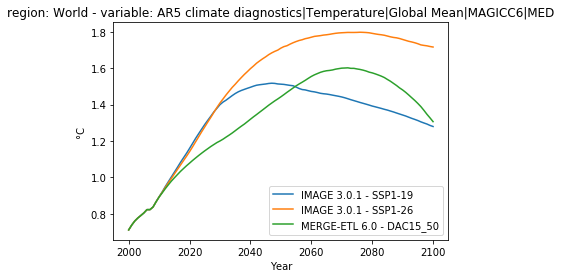

In [28]:
desired_data.filter(variable="AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED").plot()

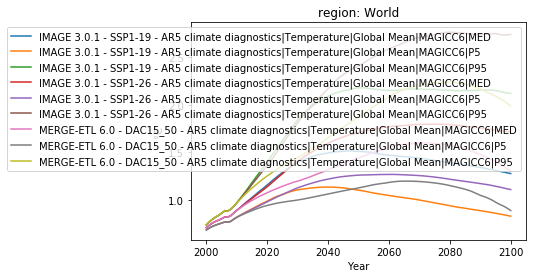

In [32]:
desired_data.filter(variable="AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|*").plot()

In [31]:
desired_data.data.to_csv("../output/exampleOvershootScenariosData.csv")

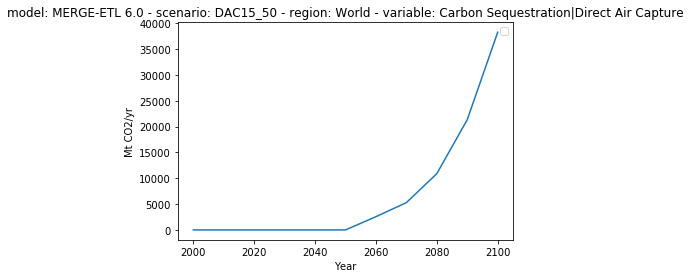

In [37]:
desired_data.filter(variable="Carbon Sequestration|Direct Air Capture", region="World").plot()

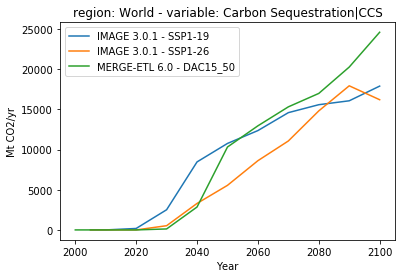

In [39]:
desired_data.filter(variable="Carbon Sequestration|CCS", region="World").plot()